In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('indian_career_recommendations.csv')


In [22]:
# 1. Basic Info
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


=== Dataset Overview ===
Shape: (5000, 22)

Data Types:
 name                  object
gender                object
stream                object
10th_percentage        int64
12th_percentage        int64
numerical_ability      int64
verbal_reasoning       int64
logical_thinking       int64
spatial_awareness      int64
problem_solving        int64
openness             float64
conscientiousness    float64
extraversion         float64
agreeableness        float64
neuroticism          float64
career_1              object
career_1_score       float64
career_1_courses      object
career_2              object
career_2_score       float64
career_3              object
career_3_score       float64
dtype: object

Missing Values:
 name                    0
gender                  0
stream                  0
10th_percentage         0
12th_percentage         0
numerical_ability       0
verbal_reasoning        0
logical_thinking        0
spatial_awareness       0
problem_solving         0
openness     

In [23]:
# 1. Drop the courses column
df.drop(columns=['career_1_courses'], inplace=True)

In [24]:
# 2. Verify remaining columns
print("Columns after dropping:\n", df.columns.tolist())


Columns after dropping:
 ['name', 'gender', 'stream', '10th_percentage', '12th_percentage', 'numerical_ability', 'verbal_reasoning', 'logical_thinking', 'spatial_awareness', 'problem_solving', 'openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism', 'career_1', 'career_1_score', 'career_2', 'career_2_score', 'career_3', 'career_3_score']


In [25]:
# Drop 'name'
df.drop(columns=['name'], inplace=True)

# Verify remaining columns (20 columns now)
print("Final columns after dropping:\n", df.columns.tolist())

Final columns after dropping:
 ['gender', 'stream', '10th_percentage', '12th_percentage', 'numerical_ability', 'verbal_reasoning', 'logical_thinking', 'spatial_awareness', 'problem_solving', 'openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism', 'career_1', 'career_1_score', 'career_2', 'career_2_score', 'career_3', 'career_3_score']


In [26]:
# Basic info
print(df.info())
print(df.head())
print(df.describe(include='all'))

# Check for nulls and duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# Distribution of primary career recommendation
print(df['career_1'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5000 non-null   object 
 1   stream             5000 non-null   object 
 2   10th_percentage    5000 non-null   int64  
 3   12th_percentage    5000 non-null   int64  
 4   numerical_ability  5000 non-null   int64  
 5   verbal_reasoning   5000 non-null   int64  
 6   logical_thinking   5000 non-null   int64  
 7   spatial_awareness  5000 non-null   int64  
 8   problem_solving    5000 non-null   int64  
 9   openness           5000 non-null   float64
 10  conscientiousness  5000 non-null   float64
 11  extraversion       5000 non-null   float64
 12  agreeableness      5000 non-null   float64
 13  neuroticism        5000 non-null   float64
 14  career_1           5000 non-null   object 
 15  career_1_score     5000 non-null   float64
 16  career_2           5000 

<ipython-input-27-707036ff47af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='career_1', order=df['career_1'].value_counts().index, palette='viridis')


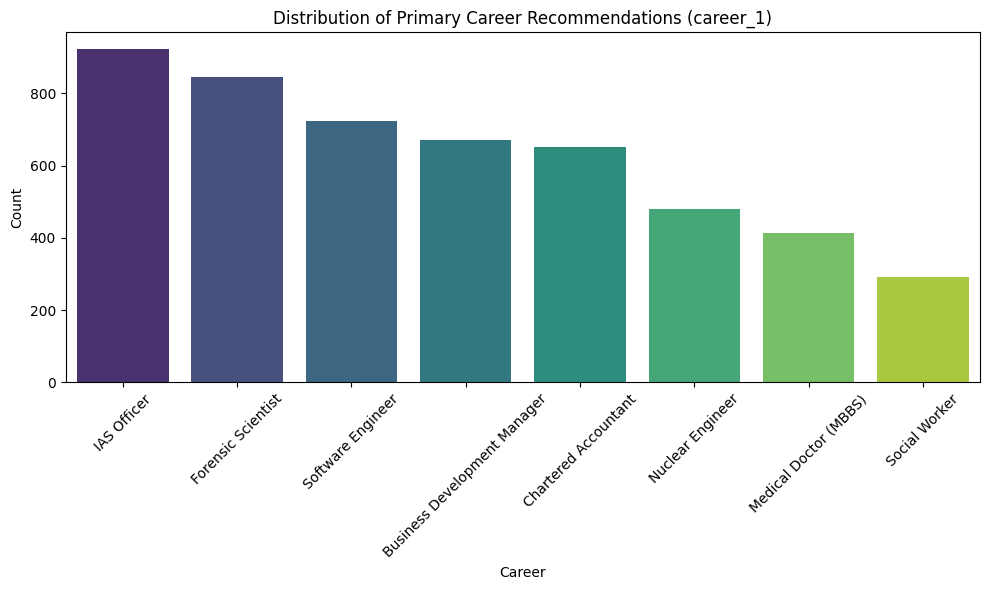

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='career_1', order=df['career_1'].value_counts().index, palette='viridis')
plt.title('Distribution of Primary Career Recommendations (career_1)')
plt.xticks(rotation=45)
plt.xlabel('Career')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-28-ede9bb10a74e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='career_1', y=feature, palette='pastel')
<ipython-input-28-ede9bb10a74e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='career_1', y=feature, palette='pastel')
<ipython-input-28-ede9bb10a74e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='career_1', y=feature, palette='pastel')
<ipython-input-28-ede9bb10a74e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

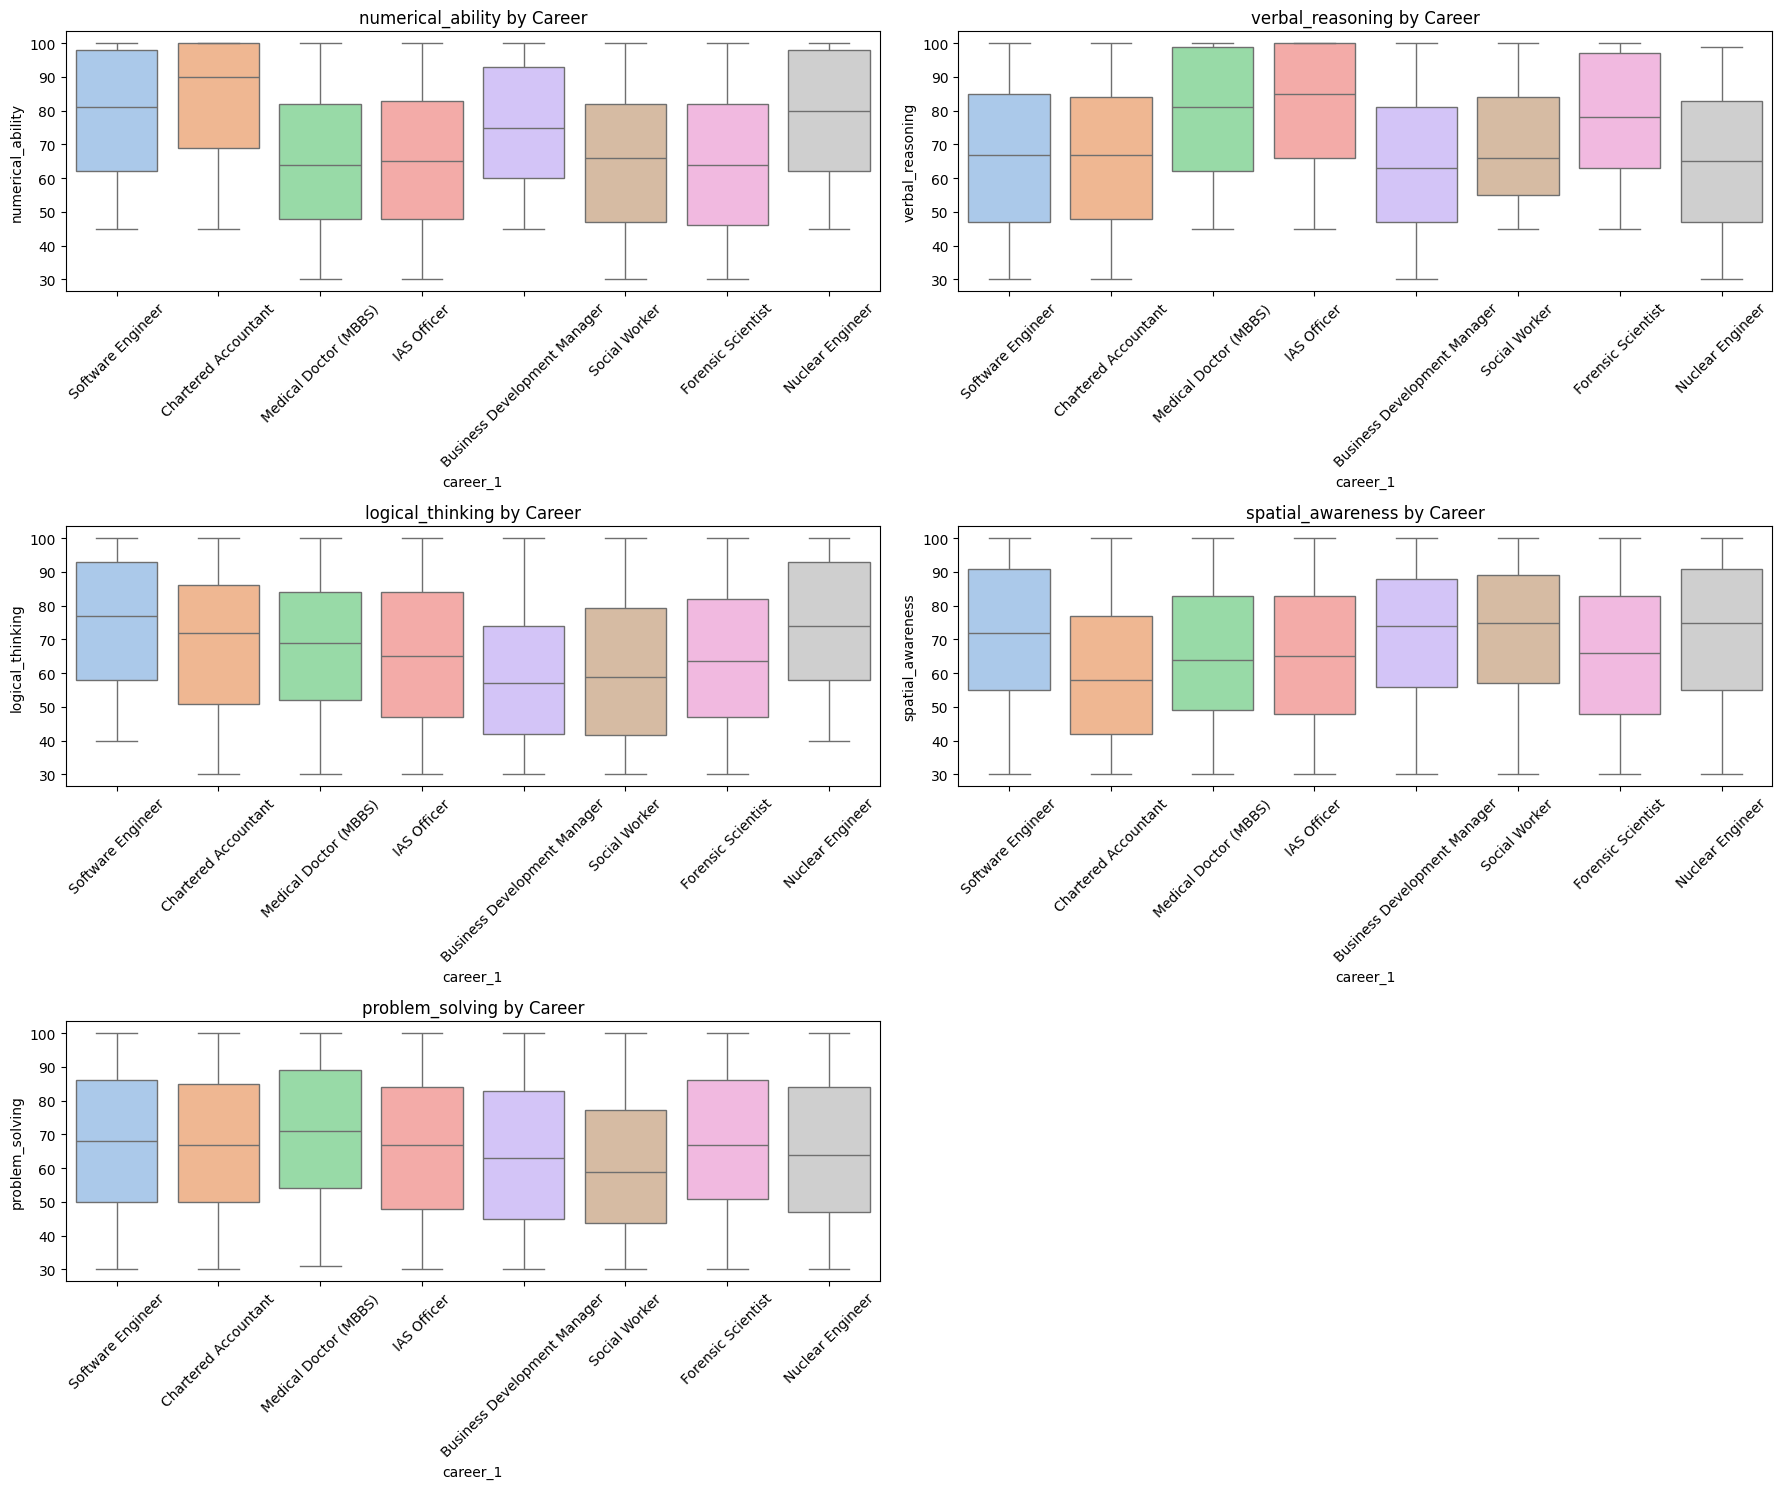

In [28]:
# List of important features to visualize
features = ['numerical_ability', 'verbal_reasoning', 'logical_thinking',
            'spatial_awareness', 'problem_solving']

plt.figure(figsize=(18, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='career_1', y=feature, palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'{feature} by Career')

plt.tight_layout()
plt.show()


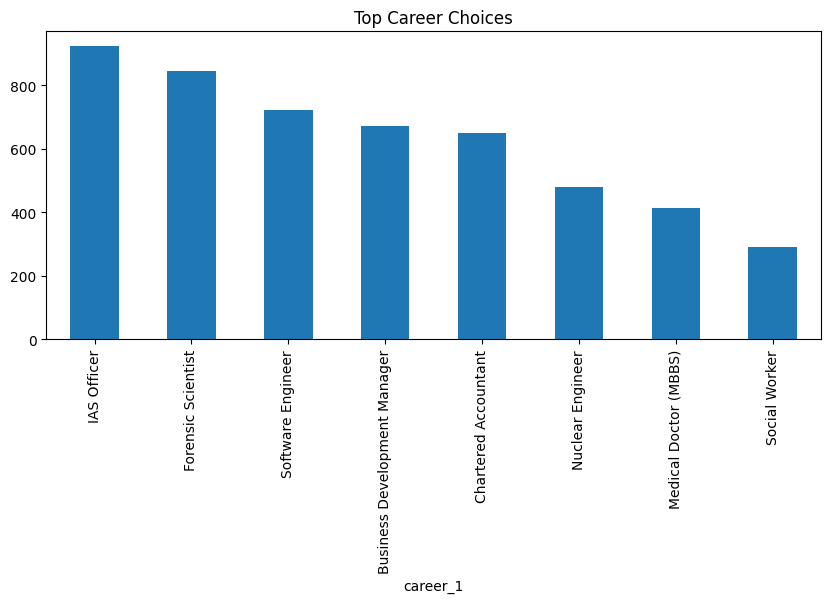

In [29]:
df['career_1'].value_counts().plot(kind='bar', figsize=(10, 4), title='Top Career Choices')
plt.show()


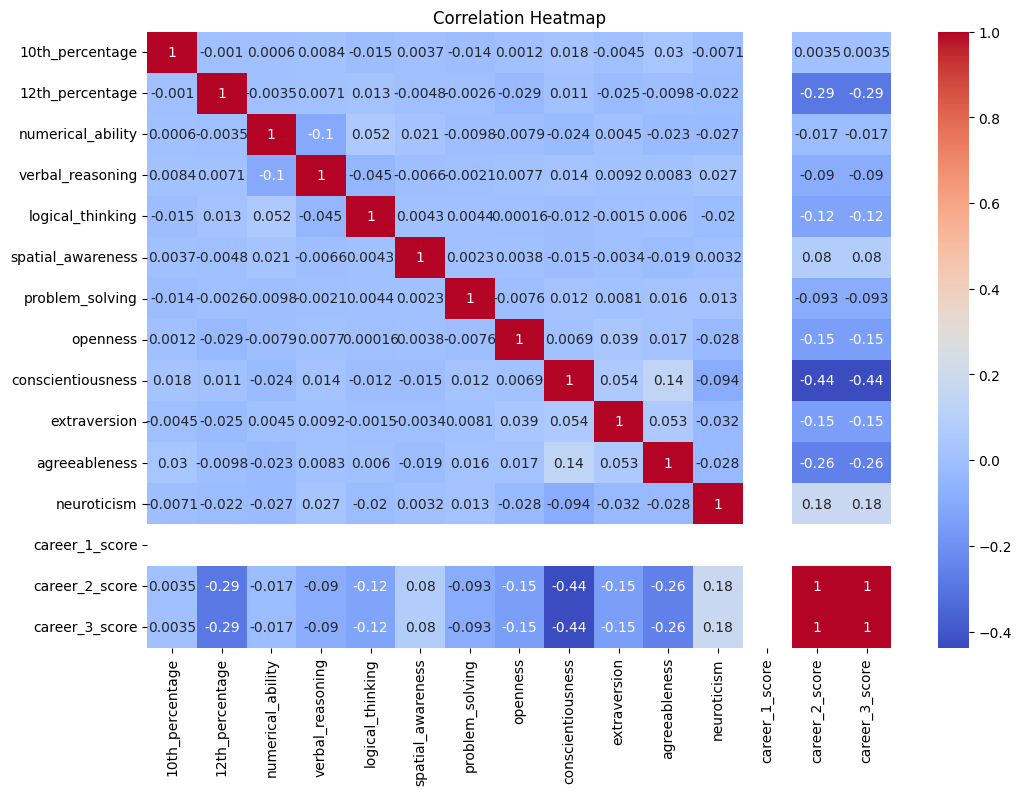

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder

# Encode gender and stream
le_gender = LabelEncoder()
le_stream = LabelEncoder()
le_career = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['stream'] = le_stream.fit_transform(df['stream'])
df['career_1'] = le_career.fit_transform(df['career_1'])  # For model training

# Save mappings for future use
gender_map = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
stream_map = dict(zip(le_stream.classes_, le_stream.transform(le_stream.classes_)))
career_map = dict(zip(le_career.classes_, le_career.transform(le_career.classes_)))


In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['career_1', 'career_1_score', 'career_2', 'career_2_score', 'career_3', 'career_3_score'])
y = df['career_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_career.classes_))


Accuracy: 0.919
                              precision    recall  f1-score   support

Business Development Manager       0.87      0.87      0.87       134
        Chartered Accountant       0.87      0.87      0.87       130
          Forensic Scientist       1.00      0.96      0.98       169
                 IAS Officer       0.85      0.98      0.91       185
       Medical Doctor (MBBS)       0.93      1.00      0.97        83
            Nuclear Engineer       1.00      0.95      0.97        96
               Social Worker       0.87      0.45      0.59        58
           Software Engineer       0.97      1.00      0.98       145

                    accuracy                           0.92      1000
                   macro avg       0.92      0.89      0.89      1000
                weighted avg       0.92      0.92      0.91      1000



In [36]:
import joblib

# Save the trained model (RandomForest in this case)
joblib.dump(rf, 'indian_career_recommendations.pkl')


['indian_career_recommendations.pkl']

In [37]:
from google.colab import files

# Download the saved model file
files.download('indian_career_recommendations.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>